In [1]:
# compare SOTA algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import cohen_kappa_score

keras.utils.set_random_seed(0)
tf.config.experimental.enable_op_determinism()
np.random.seed(0)

2024-03-30 00:59:05.115560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def print_confusion_matrix(model_name, y_test, predictions):
    class_names = [0,1]
    cm = confusion_matrix(y_test, predictions, labels=class_names)
    plt.figure()
    plt.rcParams.update({'font.size': 14})
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['N','P'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.show()

In [3]:
# load data
training_set = pd.read_csv('./data/Training_set.csv')
x_train = np.array(training_set.iloc[:,:-1])
y_train = np.array(training_set.iloc[:,-1:]).reshape(-1)
x_train, y_train = shuffle(x_train, y_train, random_state=1)

# three testing datasets
testing_set_1 = pd.read_csv('./data/PDB_testing_set.csv')
x_test_1 = np.array(testing_set_1.iloc[:,:-1])
y_test_1 = np.array(testing_set_1.iloc[:,-1:]).reshape(-1)
x_test_1, y_test_1 = shuffle(x_test_1, y_test_1, random_state=1)

testing_set_2 = pd.read_csv('./data/PubChem_testing_set.csv')
x_test_2 = np.array(testing_set_2.iloc[:,:-1])
y_test_2 = np.array(testing_set_2.iloc[:,-1:]).reshape(-1)
x_test_2, y_test_2 = shuffle(x_test_2, y_test_2, random_state=1)

testing_set_3 = pd.read_csv('./data/RPocket_testing_set.csv')
x_test_3 = np.array(testing_set_3.iloc[:,:-1])
y_test_3 = np.array(testing_set_3.iloc[:,-1:]).reshape(-1)
x_test_3, y_test_3 = shuffle(x_test_3, y_test_3, random_state=1)

<Figure size 640x480 with 0 Axes>

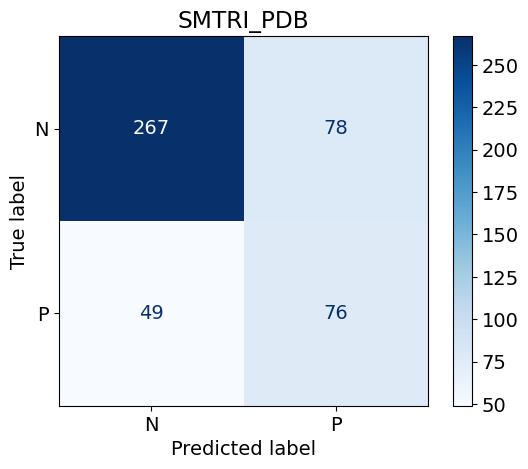

<Figure size 640x480 with 0 Axes>

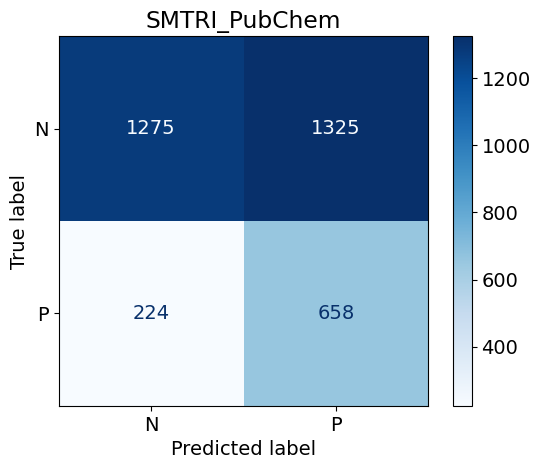

<Figure size 640x480 with 0 Axes>

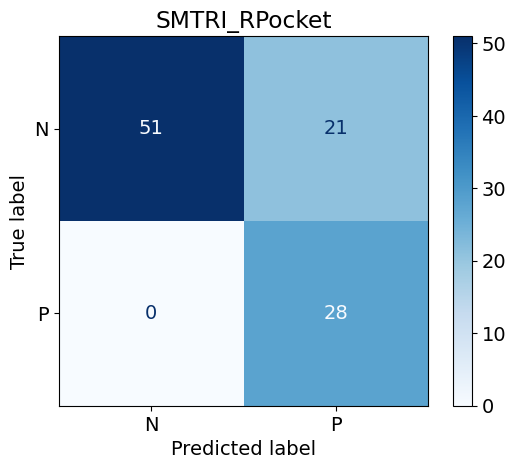

In [4]:
# SMTRI
SMTRI = tf.keras.models.load_model('./model/best_DNN_model.h5')
y_pred_1 = SMTRI.predict(x_test_1, verbose=0)
print_confusion_matrix('SMTRI_PDB', y_test_1, np.round(y_pred_1))
y_pred_2 = SMTRI.predict(x_test_2, verbose=0)
print_confusion_matrix('SMTRI_PubChem', y_test_2, np.round(y_pred_2))
y_pred_3 = SMTRI.predict(x_test_3, verbose=0)
print_confusion_matrix('SMTRI_RPocket', y_test_3, np.round(y_pred_3))

<Figure size 640x480 with 0 Axes>

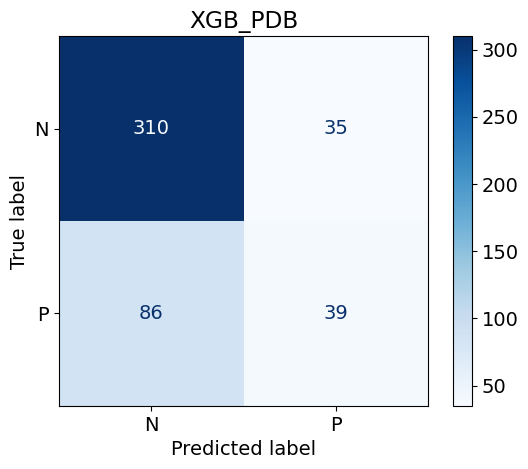

<Figure size 640x480 with 0 Axes>

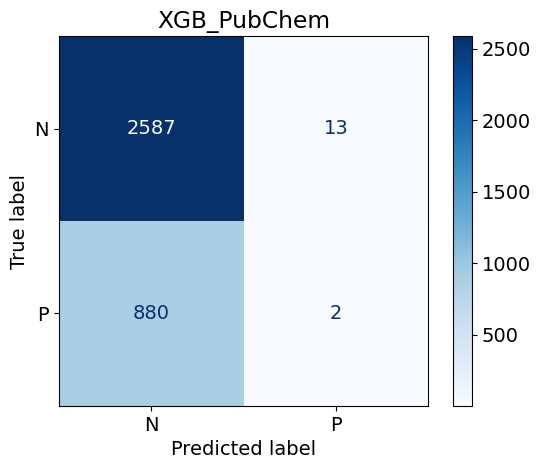

<Figure size 640x480 with 0 Axes>

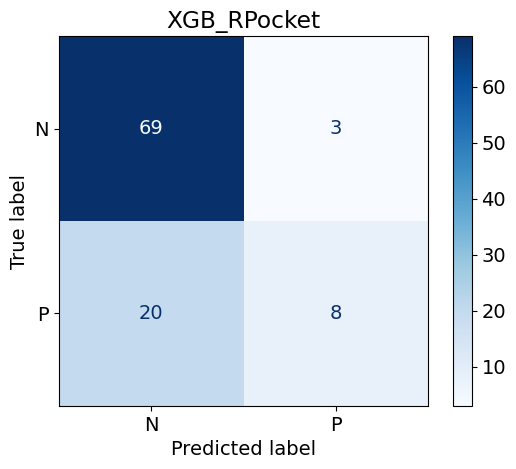

In [5]:
# XGBoost
XGB = XGBClassifier(objective= 'binary:logistic', n_estimators= 200, min_child_weight= 20, max_depth= 20, learning_rate= 0.01, gamma= 2, colsample_bytree= 0.8, booster= 'gbtree').fit(x_train, y_train)

y_pred_1 = XGB.predict_proba(x_test_1)[:,1]
print_confusion_matrix('XGB_PDB', y_test_1, np.round(y_pred_1))
y_pred_2 = XGB.predict_proba(x_test_2)[:,1]
print_confusion_matrix('XGB_PubChem', y_test_2, np.round(y_pred_2))
y_pred_3 = XGB.predict_proba(x_test_3)[:,1]
print_confusion_matrix('XGB_RPocket', y_test_3, np.round(y_pred_3))

<Figure size 640x480 with 0 Axes>

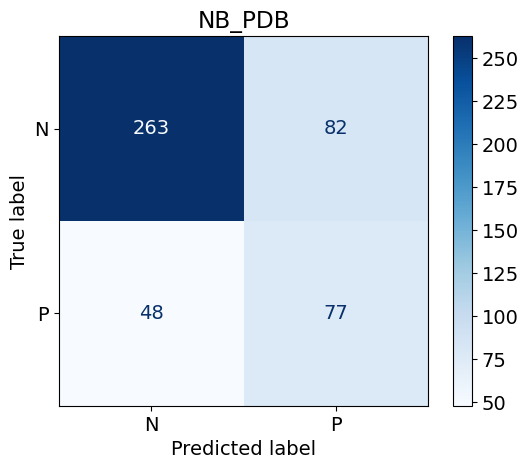

<Figure size 640x480 with 0 Axes>

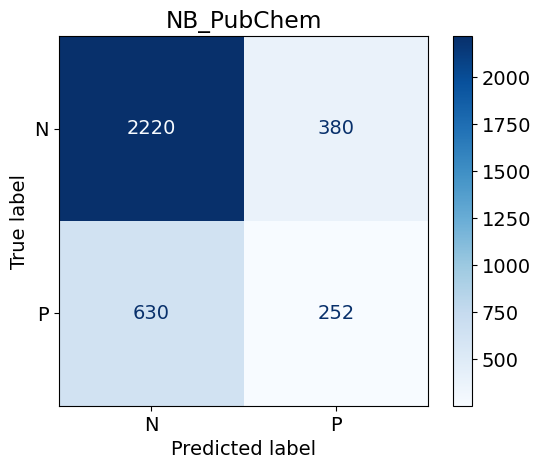

<Figure size 640x480 with 0 Axes>

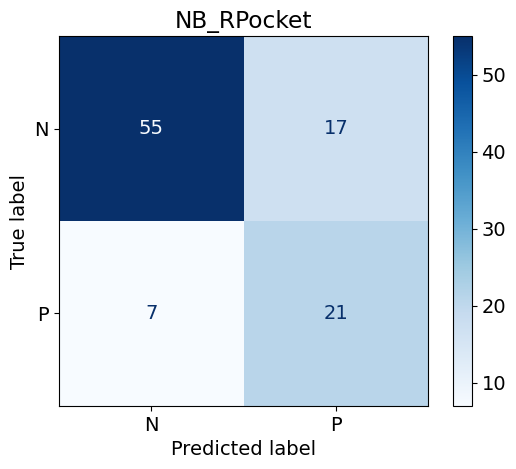

In [6]:
# NB
NB = GaussianNB(var_smoothing=1e-8).fit(x_train, y_train)

y_pred_1 = NB.predict_proba(x_test_1)[:,1]
print_confusion_matrix('NB_PDB', y_test_1, np.round(y_pred_1))
y_pred_2 = NB.predict_proba(x_test_2)[:,1]
print_confusion_matrix('NB_PubChem', y_test_2, np.round(y_pred_2))
y_pred_3 = NB.predict_proba(x_test_3)[:,1]
print_confusion_matrix('NB_RPocket', y_test_3, np.round(y_pred_3))

<Figure size 640x480 with 0 Axes>

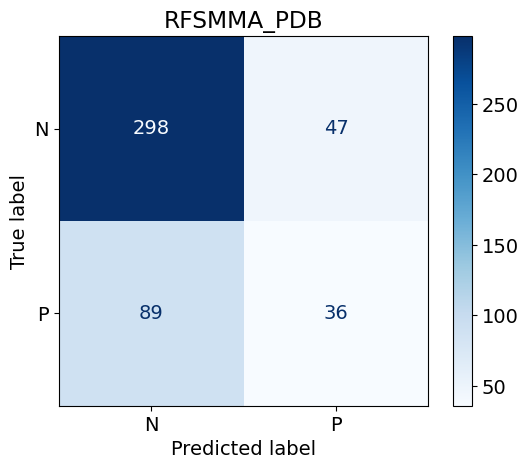

<Figure size 640x480 with 0 Axes>

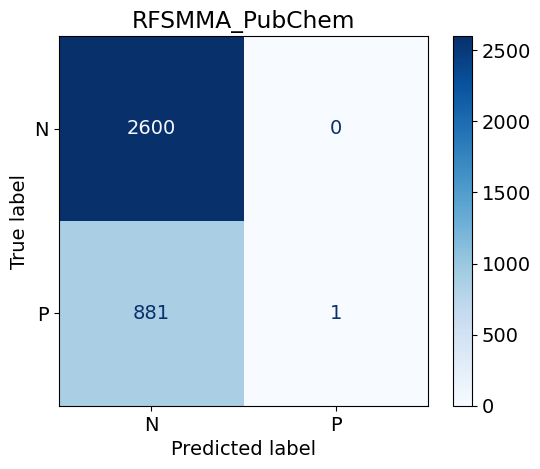

<Figure size 640x480 with 0 Axes>

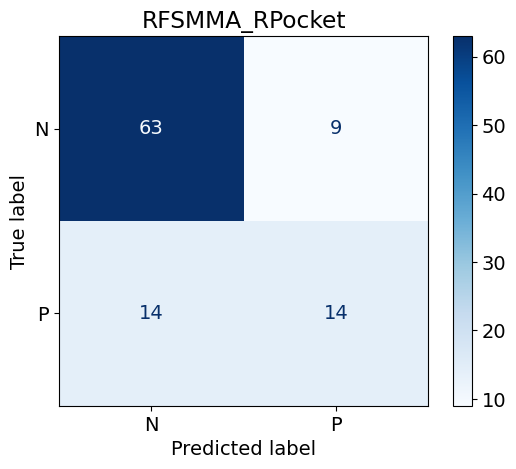

In [7]:
# RFSMMA
RFSMMA = RandomForestClassifier(n_estimators= 25, min_samples_split= 4, max_features= 'log2', max_depth= 10, criterion= 'log_loss').fit(x_train, y_train)

y_pred_1 = RFSMMA.predict_proba(x_test_1)[:,1]
print_confusion_matrix('RFSMMA_PDB', y_test_1, np.round(y_pred_1))
y_pred_2 = RFSMMA.predict_proba(x_test_2)[:,1]
print_confusion_matrix('RFSMMA_PubChem', y_test_2, np.round(y_pred_2))
y_pred_3 = RFSMMA.predict_proba(x_test_3)[:,1]
print_confusion_matrix('RFSMMA_RPocket', y_test_3, np.round(y_pred_3))